# Clustering

## k-means

### Basics

Here, "label" refers to the cluster ID the object gets assigned to, not the true data, since this is unsupervised learning.

In hard clustering, each item gets assigned to only one cluster

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
all(kmeans.labels_ == y_pred)

True

In [4]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [5]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3])

In soft clustering, each data point gets a score for each cluster (the distance to the centre):

In [6]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

The algorithm works by choosing random centroids, then progressively updating until we converge on a solution. However, we are not guaranteed to find the global optimum.

To improve it, we can give some estimations of starting points, or tell it to run several times and keep the best results:

In [7]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, random_state=42)
kmeans.fit(X)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, random_state=42)

In [8]:
kmeans.inertia_

211.59853725816836

In [9]:
kmeans = KMeans(n_clusters=5, n_init=100, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=100, random_state=42)

In [10]:
kmeans.inertia_

211.59853725816836

The intertia is a bad measure of performance, since models with more centroids will tend to have a lower inertia. A better measure is the silhouette score, which should be as close to 1 as possible

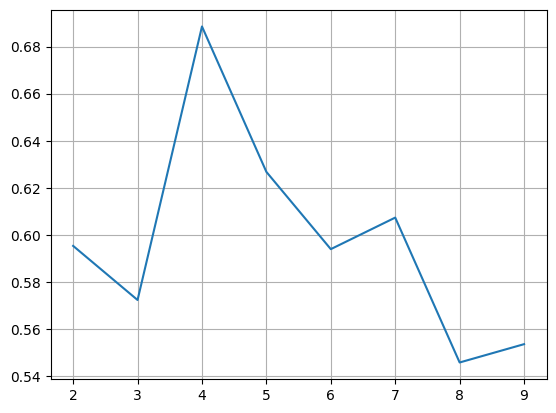

In [11]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


silhouettes = []
cluster_nums = np.arange(2,10)

for n in cluster_nums:
    km = KMeans(n_clusters=n, n_init=1, random_state=42)
    km.fit(X)
    silhouettes.append(silhouette_score(X, km.labels_))


plt.plot(cluster_nums, silhouettes)
plt.grid()



### Image segmentation

In [12]:
import PIL

image = np.asarray(PIL.Image.open("ladybug.png"))
image.shape

(533, 800, 3)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


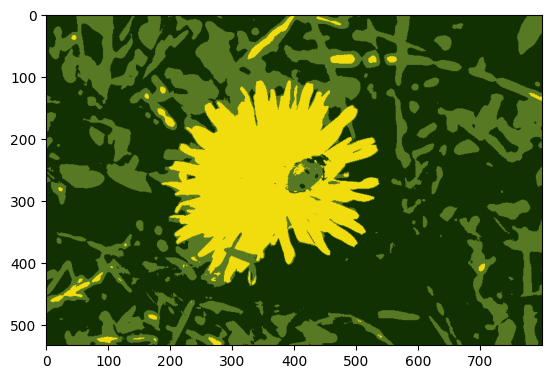

In [13]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img/255)

### Semi-supervised learning

In [14]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [15]:
# baseline performance, assuming only 50 models are labelled

from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)

log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])


LogisticRegression(max_iter=10000)

In [16]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [17]:
# Now, cluster the data and find the image closest to the centroid of each

k=50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) # distance of each instance to centroids
rep_digits_indexes = np.argmin(X_digits_dist, axis=0) # get centroid index with min distance
X_rep_digits = X_train[rep_digits_indexes] # get the images associated with these data points

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


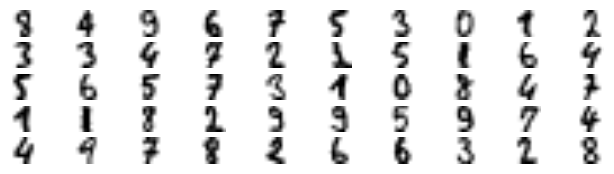

In [18]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_rep_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [19]:
# we label them manually
y_representative_digits = np.array([
    8,4,9,6,7,5,3,0,1,2,
    3,3,4,7,2,1,5,1,6,4,
    5,6,5,7,3,1,0,8,4,7,
    1,1,8,2,9,9,5,9,7,4,
    4,9,7,8,2,6,6,3,2,8
])

In [20]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_rep_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8413098236775819

In [21]:
# we can propagate these labels to all other instances in each cluster, and then retrain on the whole set:

y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8639798488664987

## DBSCAN

For every point, we count the number of points within an $\varepsilon$ neighbourhood. If this is above a certain amount, then we call it a **core instance**. All instances in the neighbourhood of a core instance are part of a cluster, and this can span multiple core instances.

Other points are considered anomalies.

Hence, this works well if clusters are well separated by low density regions.

Another advantage is it allows for weirdly shaped clusters, as demonstrated below using the `make_moons` dataset.

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [23]:
dbscan.labels_

# instances with label -1 are anomalies

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [24]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [25]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

`DBSCAN` cannot directly predict the cluster that a new datapoint is in. Instead, we have to use another classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [27]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [28]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

# Gaussian Mixtures

We assume instances are generated from a mix of variuos Gaussians.

For each instance, a cluster is picked at random from $k$ clusters, with each cluster having probability $\phi(j)$. The index of the cluster for the $i$ th instance is $z(i)$.

Then, if the $i$ th instance is in the $j$ th cluster, its location is drawn randomly from a normal distribution; $x(i) \sim \mathcal{N} (\mu(j), \Sigma(j)) $


In [35]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [36]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [37]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [38]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [39]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [40]:
gm.converged_

True

In [41]:
gm.n_iter_

4

In [42]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [43]:
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

In [44]:
# we can also get the densities at each point (higher score is higher density):

gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

## Anomaly Detection

Elements in low density regions can be considered to be anomalies:

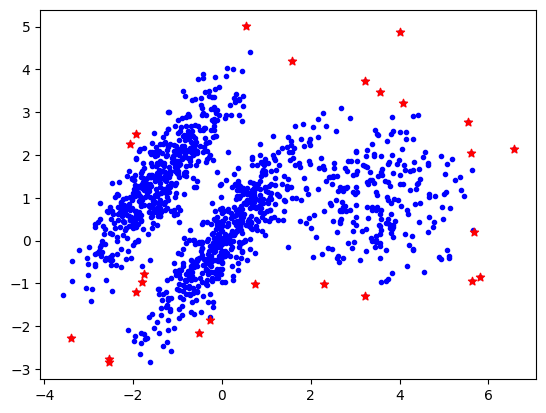

In [53]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities<density_threshold]


plt.scatter(*X.T, marker=".", c="b")
plt.scatter(*anomalies.T, marker="*", c="r")


### Likelihood vs probability

The **probability** is, given some parameters $\bm{\theta}$, how likely is a particular future outcome $\bm{x}$.

The **likelihood** is, if we know some outcome $\bm{x}$, how plausible is a parameter set $\bm{\theta}$.

Consider a 1D distribution, consisting of 2 Gaussians, one at $x=-4$ and another at $x=1$. 

![](mls3_0919.png)

The entire model is in the top left, as a contour plot $f(x, \theta)$.

If we choose a $\theta$ value (horizontal line), we get the PDF in the bottom left.

If, instead, we measure a value of $x$ and do not know $\theta$, we get the upper right plot - the likelihood.

The likelihood is **not** a probability distribution - it does not integrate to 1

Given a dataset $\mathbf{X}$, the set of parameters that maximises the likelihood is the MLE $\hat{\mathbf{\theta}}$ .

The maximum likelihood function is then $\hat{\mathcal{L}} = \mathcal{L}\left(\hat{\mathbf{\theta}}, \mathbf{X} \right)$  

There are 2 possible criteria we may try to minimise that depend on $\hat{\mathcal{L}}$; the BIC and AIC

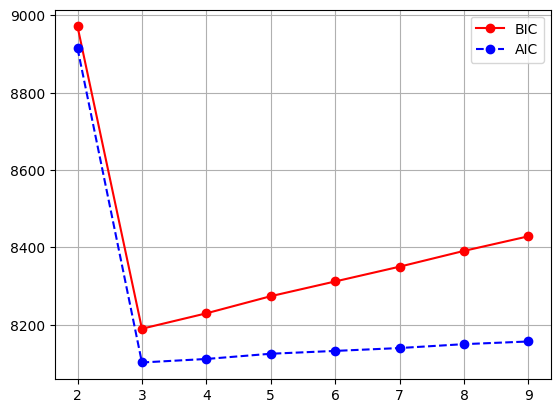

In [58]:
components = np.arange(2,10)
bics, aics = [], []

for c in components:
    gm = GaussianMixture(n_components=c, n_init=10, random_state=42)
    gm.fit(X)

    bics.append(gm.bic(X))
    aics.append(gm.aic(X))


plt.plot(components, bics, "ro-", label = "BIC")
plt.plot(components, aics, "bo--", label = "AIC")
plt.legend()
plt.grid()

In [59]:
# we can use BayesianGaussianMixture to get weights for each class, to work out how many are useful

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])